In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# Get the Model (Efficient Net B0 Model)

In [2]:
model_0 = tf.keras.models.load_model("../trained_models/best_efficient_net_model_ep_last.h5") 

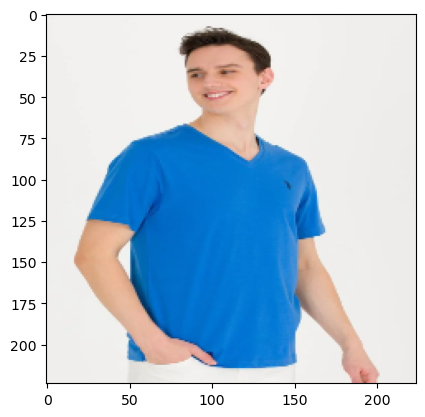

In [9]:
from helpers import show_image
show_image("../data/demo/V YAKA_USPA.PNG")

In [17]:
import numpy as np
import cv2
import requests

def get_image(url, scale_percent, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = (size[0], size[1]) 
    
    output =  tf.reshape(cv2.resize(image, dsize), [1, size[0], size[1], size[2]])

    return output 

In [29]:
img = get_image("https://aydinli-polo.b-cdn.net/products/2023/01/13/815559/e963485d-3e6f-474e-9dea-8cebed0dc4ae_size780x1170_quality100_cropCenter.jpg",
        scale_percent=None, 
        size=(224, 224, 3)) 

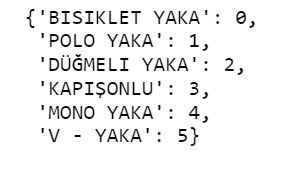

In [30]:
preds = model_0.predict(img) 
preds[preds > 0.5] = 1 
preds[preds <= 0.5] = 0  

preds

1/1 [==============================] - 0s 53ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

# Get Eval Data 

In [36]:
eval_data = pd.read_csv(
    "../data/eval_data_neckline_based_6.csv",
    header=None,
    names=["sidsecenek", 'secenek', 'img_url', 'class', 'partition']
).sample(frac=1).reset_index(drop=True) 

eval_data.head() 

,sidsecenek,secenek,curl,tip,part
0,220896,G081CS011.P63.TP04I14.732,https://resim.aydinli.com.tr/08/1/011/S4003558...,POLO YAKA,eval_data
1,591757,G083SZ004.000.518678.VR049,https://resim.aydinli.com.tr/08/3/004/S5017621...,DÜĞMELI YAKA,eval_data
2,286462,G082CS011.P26.TP01.370,https://resim.aydinli.com.tr/08/2/011/S3000989...,POLO YAKA,eval_data
3,259125,G081CS0TK.P01.TH02.210,https://resim.aydinli.com.tr/08/1/0TK/S3000768...,V - YAKA,eval_data
4,434715,G081SZ082.000.71009.MV0049,https://resim.aydinli.com.tr/08/1/082/S5011353...,POLO YAKA,eval_data
